In [ ]:
import pandas as pd

In [ ]:
train_df = pd.read_json('/content/classifier_data_train.json', lines=True)
train_df

,author,year,lang,text,file
0,Wilhelm Busch,unknown,de,"[Ebergötzen, nach Weihnachten 1841] Theure Elt...",busch/json/busch_1.json
1,Wilhelm Busch,unknown,de,"Es geht mir immer noch gut, und es hat mir, so...",busch/json/busch_1.json
2,Wilhelm Busch,unknown,de,Am zweiten Weihnachtstage waren wir nach dem A...,busch/json/busch_1.json
3,Wilhelm Busch,unknown,de,Ferien haben wir aber in dieser Zeit nicht geh...,busch/json/busch_1.json
4,Wilhelm Busch,unknown,de,Um Euch aber doch einen kleinen Beweis zu gebe...,busch/json/busch_1.json
...,...,...,...,...,...
39072,Virginia Woolf,1918,en,We now think of charging 1/6 anyhow; so we oug...,woolf/json/letter_999.json
39073,Virginia Woolf,1918,en,If Duncan would explain the method to Wolfe I ...,woolf/json/letter_999.json
39074,Virginia Woolf,1918,en,I should be very grateful for a line to say ho...,woolf/json/letter_999.json
39075,Virginia Woolf,1918,en,At any rate its certain to be a source of acut...,woolf/json/letter_999.json


In [ ]:
# change the authors to numbers so that we can classify them
authors = train_df['author'].unique()
label_dict = {}
for index, author in enumerate(authors):
    label_dict[author] = index

train_df['author'].replace(to_replace=authors, value=list(range(len(authors))), inplace=True)
train_df = train_df.drop(train_df.columns[[1,2,4]], axis=1)
print(label_dict)

{'Wilhelm Busch': 0, 'Henrik Ibsen': 1, 'James Joyce': 2, 'Franz Kafka': 3, 'Friedrich Schiller': 4, 'Johann Wolfgang von Goethe': 5, 'Virginia Woolf': 6}


In [ ]:
with open('label_mapping.txt', 'w') as f:
    for k,v in label_dict.items():
        f.write(f'{k} : {v}')
        f.write('\n')

In [ ]:
train_df.columns = ['label', 'text']
train_df = train_df[['text', 'label']]
train_df

,text,label
0,"[Ebergötzen, nach Weihnachten 1841] Theure Elt...",0
1,"Es geht mir immer noch gut, und es hat mir, so...",0
2,Am zweiten Weihnachtstage waren wir nach dem A...,0
3,Ferien haben wir aber in dieser Zeit nicht geh...,0
4,Um Euch aber doch einen kleinen Beweis zu gebe...,0
...,...,...
39072,We now think of charging 1/6 anyhow; so we oug...,6
39073,If Duncan would explain the method to Wolfe I ...,6
39074,I should be very grateful for a line to say ho...,6
39075,At any rate its certain to be a source of acut...,6


In [ ]:
eval_df = pd.read_json('/content/classifier_data_eval.json', lines=True)
eval_df

,author,year,lang,text,file
0,Wilhelm Busch,unknown,de,"Ich war aber der Einzige, dem der Christmann s...",busch/json/busch_1.json
1,Wilhelm Busch,unknown,de,"Gestern war ich auch zum ersten Male, aber der...",busch/json/busch_10.json
2,Wilhelm Busch,unknown,de,Erst wasche Dich und schneuze Dich. Und bist D...,busch/json/busch_100.json
3,Wilhelm Busch,unknown,de,neige) ; dagegen ist die Marschall Niel hinter...,busch/json/busch_1001.json
4,Wilhelm Busch,unknown,de,Inzwischen grünt und blüht dieser heurige Früh...,busch/json/busch_1004.json
...,...,...,...,...,...
4876,Virginia Woolf,1918,en,But he is writing an account of his feeling. I...,woolf/json/letter_996.json
4877,Virginia Woolf,1918,en,"Eliot has sent us some of his poems, which we ...",woolf/json/letter_997.json
4878,Virginia Woolf,1918,en,") Eliot, I may add, said that he greatly admir...",woolf/json/letter_997.json
4879,Virginia Woolf,1918,en,Then I saw old Katie [Cromer] bobbing her head...,woolf/json/letter_999.json


In [ ]:
# change the authors to numbers so that we can classify them
#Author = ['Wilhelm Busch', 'Henrik Ibsen', 'James Joyce', 'Franz Kafka', 'Friedrich Schiller', 'Johann Wolfgang von Goethe', 'Virginia Woolf']
authors = eval_df['author'].unique()
eval_df['author'].replace(to_replace=authors, value=list(range(len(authors))), inplace=True)
eval_df = eval_df.drop(eval_df.columns[[1,2,4]], axis=1)

In [ ]:
eval_df.columns = ['label', 'text']
eval_df = eval_df[['text', 'label']]
eval_df

,text,label
0,"Ich war aber der Einzige, dem der Christmann s...",0
1,"Gestern war ich auch zum ersten Male, aber der...",0
2,Erst wasche Dich und schneuze Dich. Und bist D...,0
3,neige) ; dagegen ist die Marschall Niel hinter...,0
4,Inzwischen grünt und blüht dieser heurige Früh...,0
...,...,...
4876,But he is writing an account of his feeling. I...,6
4877,"Eliot has sent us some of his poems, which we ...",6
4878,") Eliot, I may add, said that he greatly admir...",6
4879,Then I saw old Katie [Cromer] bobbing her head...,6


In [ ]:
import torch
print(torch. __version__)

1.10.0+cu111


In [ ]:
!pip install simpletransformers
!pip install transformers
!pip install tensorboardx

     |████████████████████████████████| 247 kB 4.2 MB/s 
     |████████████████████████████████| 1.7 MB 37.5 MB/s 
     |████████████████████████████████| 3.4 MB 65.0 MB/s 
     |████████████████████████████████| 9.3 MB 54.2 MB/s 
     |████████████████████████████████| 43 kB 2.4 MB/s 
     |████████████████████████████████| 6.8 MB 59.9 MB/s 
     |████████████████████████████████| 1.2 MB 70.5 MB/s 
     |████████████████████████████████| 306 kB 94.0 MB/s 
     |████████████████████████████████| 3.3 MB 73.8 MB/s 
     |████████████████████████████████| 596 kB 59.7 MB/s 
     |████████████████████████████████| 67 kB 6.7 MB/s 
     |████████████████████████████████| 895 kB 68.7 MB/s 
     |████████████████████████████████| 97 kB 8.6 MB/s 
     |████████████████████████████████| 180 kB 72.2 MB/s 
     |████████████████████████████████| 142 kB 93.6 MB/s 
     |████████████████████████████████| 63 kB 2.2 MB/s 
     |████████████████████████████████| 133 kB 73.0 MB/s 
     |█████████████████

     |████████████████████████████████| 124 kB 4.1 MB/s 


In [ ]:
torch.cuda.is_available()

True

In [ ]:
from simpletransformers.classification import ClassificationModel, ClassificationArgs
from multiprocessing import cpu_count

model_args = ClassificationArgs(num_train_epochs=3, 
                                learning_rate=5e-05, 
                                overwrite_output_dir= True,
                                warmup_steps=0,
                                reprocess_input_data=False,
                                process_count=cpu_count() - 2 if cpu_count() > 2 else 1)

# Create a MultiLabelClassificationModel
model = ClassificationModel('roberta', 'distilroberta-base', num_labels=len(authors), use_cuda=True, args=model_args)

Some weights of the model checkpoint at distilroberta-base were not used when initializing RobertaForSequenceClassification: ['lm_head.dense.bias', 'lm_head.decoder.weight', 'roberta.pooler.dense.weight', 'lm_head.dense.weight', 'lm_head.layer_norm.weight', 'lm_head.bias', 'lm_head.layer_norm.bias', 'roberta.pooler.dense.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at distilroberta-base and are newly initialized: ['classifier.dense.bias', 

In [ ]:
model.train_model(train_df=train_df, eval_df=eval_df)

/usr/local/lib/python3.7/dist-packages/simpletransformers/classification/classification_model.py:586: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


Epoch:   0%|          | 0/3 [00:00<?, ?it/s]

Running Epoch 0 of 3:   0%|          | 0/4885 [00:00<?, ?it/s]

Running Epoch 1 of 3:   0%|          | 0/4885 [00:00<?, ?it/s]

Running Epoch 2 of 3:   0%|          | 0/4885 [00:00<?, ?it/s]

(14655, 0.22701690336921782)

/usr/local/lib/python3.7/dist-packages/simpletransformers/classification/classification_model.py:1427: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


Running Evaluation:   0%|          | 0/611 [00:00<?, ?it/s]

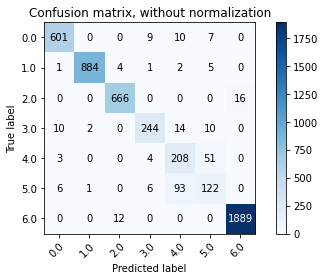

In [ ]:
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, classification_report
import json
import sklearn.metrics
import sklearn.exceptions
from sklearn.utils.multiclass import unique_labels
import time
import numpy as np
import matplotlib.pyplot as plt


def f1_multiclass(labels, preds):
    return f1_score(labels, preds, average='micro')

def c_matrix(labels, preds, file_name='/content',
                                    normalize=False,
                                    cmap=plt.cm.Blues,
                                    show = True):

    np.set_printoptions(precision=2)
    if normalize:
        title = 'Normalized confusion matrix'
    else:
        title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(labels, preds)
    # Only use the labels that appear in the data
    classes = unique_labels(labels, preds)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    plt.savefig(file_name)
    if(show):
       return plt.show()

    

def c_reports(labels, preds):
    return classification_report(labels, preds)
    
result, model_outputs, wrong_predictions = model.eval_model(eval_df, 
                                                            f1=f1_multiclass, 
                                                            acc=accuracy_score, 
                                                            confusionmatrix=c_matrix, 
                                                            classificationreport=c_reports , 
                                                            output_dir='/content')


In [ ]:
with open('Wrong_Predictions.txt', 'w') as f:
    for lines in wrong_predictions:
        for line in lines:
          f.write(str(line))
          f.write('\n')


In [ ]:
#print(f"results: {result}")
#print(f"model output: {model_outputs} ")
#print(f"wrong predictions: {wrong_predictions}")
result

{'acc': 0.9702929727514854,
 'classificationreport': '              precision    recall  f1-score   support\n\n         0.0       0.98      0.98      0.98       627\n         1.0       0.99      0.99      0.99       897\n         2.0       0.97      0.97      0.97       682\n         3.0       0.96      0.99      0.98       280\n         4.0       0.86      0.85      0.85       266\n         5.0       0.82      0.82      0.82       228\n         6.0       0.99      0.99      0.99      1901\n\n    accuracy                           0.97      4881\n   macro avg       0.94      0.94      0.94      4881\nweighted avg       0.97      0.97      0.97      4881\n',
 'confusionmatrix': None,
 'eval_loss': 0.2157109146861515,
 'f1': 0.9702929727514854,
 'mcc': 0.9614274545978473}

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
ls

cache_dir/                  eval_results.txt   outputs/
classifier_data_eval.json   gdrive/            runs/
classifier_data_train.json  label_mapping.txt  sample_data/


In [ ]:
model_save_name = 'ST_epoch3'
path = F"/content/gdrive/My Drive/{model_save_name}" 
torch.save(model, path)